In [5]:
import pandas as pd 
import numpy as np 
import openai
import os 
from dotenv import load_dotenv


In [6]:
load_dotenv()

True

In [7]:
dataset = pd.read_csv('one_shot_responses.csv')
# please take a random sample of 10 rows from the dataset
sample = dataset.sample(500)
# extract only the columns 'response' and 'label' from the sample
sample = sample[['response', 'label']]
# create a csv 
sample.to_csv('sample.csv', index=False)
print(sample)




                                               response        label
925   Your farmland's current nutrient levels, pH, a...  pomegranate
698   Based on the data, mungbean is a suitable crop...     mungbean
2     Based on your farmland's conditions, you shoul...         rice
561   Based on your soil and environmental condition...    mothbeans
626   Based on the conditions, mungbean seems like a...     mungbean
...                                                 ...          ...
323   Based on the conditions, kidney beans would be...  kidneybeans
710   Based on the provided conditions, blackgram ap...    blackgram
357   Based on your farmland data, growing kidney be...  kidneybeans
451   Based on your farmland's soil and climate cond...   pigeonpeas
1108  Considering the conditions of your farmland an...        mango

[500 rows x 2 columns]


In [8]:
API_KEY = os.getenv("OPENAI_API_KEY")

OPENAI_CLIENT = openai.OpenAI(
    api_key=API_KEY,
)

In [4]:
def translate(user_prompt,language):
    
    
    
    
    
    completion_response = OPENAI_CLIENT.chat.completions.create(
            model = 'gpt-4o',
            messages=[
                {"role": "system", "content": f"Translate the following text to {language}"},
                {"role": "user", "content": f"{user_prompt}"}
            ]
        )
    response =completion_response.choices[0].message.content
    return response


In [8]:
# transltate the sample to urdu punjabi and sidhi

sample['urdu'] = sample['response'].apply(lambda x: translate(x, 'urdu'))
sample['punjabi'] = sample['response'].apply(lambda x: translate(x, 'roman punjabi'))
sample['sindhi'] = sample['response'].apply(lambda x: translate(x, 'sindhi'))

# create a csv
sample.to_csv('translated_sample.csv', index=False)


In [6]:
# 
dataset = pd.read_csv('zero_shot_responses.csv')
dataset.head()

,nitrogen,phosphorus,potassium,temperature,humidity,pH,rainfall,response,label,y_pred
0,90,42,43,20.879744,82.002744,6.502985,202.935536,You have suitable conditions for growing crops...,rice,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Consider growing leafy vegetables like spinach...,rice,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Try growing asparagus; it prefers slightly alk...,rice,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,"You can grow rice, as the conditions of your f...",rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,"Considering the soil and weather conditions, y...",rice,0


Accuracy for rice: 0.61
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean']
Accuracy for maize: 0.13
Accuracy for chickpea: 0.0
Accuracy for kidneybeans: 0.0
Accuracy for pigeonpeas: 0.0
Accuracy for mothbeans: 0.0
Accuracy for mungbean: 0.0


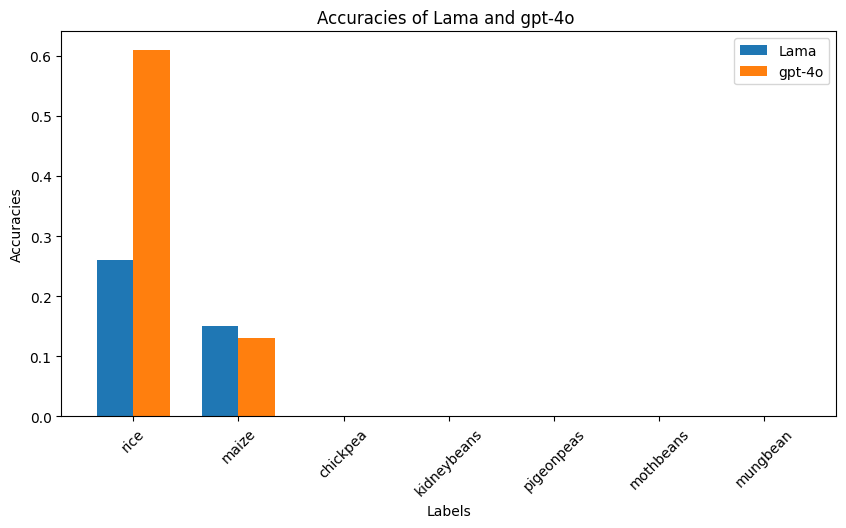

In [7]:
rice = dataset[dataset['label'] == 'rice']
# accuracy for rice
rice_accuracy = sum(rice['y_pred'] ) / len(rice)
print(f'Accuracy for rice: {rice_accuracy}')

# columns 
print(dataset['label'].unique())    
# do the same for the other labels

# accuracy for maize 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans''mungbean'
maize = dataset[dataset['label'] == 'maize']
maize_accuracy = sum(maize['y_pred']) / len(maize)
print(f'Accuracy for maize: {maize_accuracy}')


chickpea = dataset[dataset['label'] == 'chickpea']
chickpea_accuracy = sum(chickpea['y_pred']) / len(chickpea)
print(f'Accuracy for chickpea: {chickpea_accuracy}')

kidneybeans = dataset[dataset['label'] == 'kidneybeans']
kidneybeans_accuracy = sum(kidneybeans['y_pred']) / len(kidneybeans)
print(f'Accuracy for kidneybeans: {kidneybeans_accuracy}')

pigeonpeas = dataset[dataset['label'] == 'pigeonpeas']
pigeonpeas_accuracy = sum(pigeonpeas['y_pred']) / len(pigeonpeas)
print(f'Accuracy for pigeonpeas: {pigeonpeas_accuracy}')

mothbeans = dataset[dataset['label'] == 'mothbeans']
mothbeans_accuracy = sum(mothbeans['y_pred']) / len(mothbeans)
print(f'Accuracy for mothbeans: {mothbeans_accuracy}')


mungbean = dataset[dataset['label'] == 'mungbean']
# print(mungbean)
mungbean_accuracy = sum(mungbean['y_pred']) / len(mungbean)
print(f'Accuracy for mungbean: {mungbean_accuracy}')

# now plot theses accuracies with a bar plot with x axis as the labels and y axis as the accuracies
llama_accuracies = [0.26,0.15,0,0,0,0,0]
import matplotlib.pyplot as plt
labels = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans', 'mungbean']
accuracies = [rice_accuracy, maize_accuracy, chickpea_accuracy, kidneybeans_accuracy, pigeonpeas_accuracy, mothbeans_accuracy, mungbean_accuracy]
# PLOT LAMA ACCURACIES SIDE BY SIDE WITH THE MODEL ACCURACIES
fig, ax = plt.subplots(figsize=(10, 5))  # Set the figure size here
bar_width = 0.35
index = np.arange(len(labels))
lama = ax.bar(index, llama_accuracies, bar_width, label='Lama')
model = ax.bar(index + bar_width, accuracies, bar_width, label='gpt-4o')
ax.set_xlabel('Labels')
ax.set_ylabel('Accuracies')
ax.set_title('Accuracies of Lama and gpt-4o ')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels, rotation=45)  # Set the x-tick labels here
ax.legend()
plt.show()

